# Churn Prediction for Bank Customers

# Features
- CustomerId : Contains random numbers, no effect on our target variable.
- Surname : Customer's last name, it has no effect on our problem.
- CreditScore : Refers to the credit score.
- Geography : Refers to the country. (France, Germany, Spain)
- Gender : Refers to gender. (Femal or Male)
- Age : Refers to the age of the customer.
- Tenure : It refers to the number of years that the customer is a customer of the bank.
- Balance : Person's account balance.
- NumOfProducts : Refers to the number of products a customer has purchased through a bank.
- HasCrCard : Indicates whether the customer has a credit card.(0 or 1)
- IsActiveMember : It expresses whether the customer is active in using banks.(0 or 1)
- EstimatedSalary : Estimated salary of the customer.
- Exited : Whether the customer has left the bank.(1 left 0 remainder)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("H:\\Level 4 Information Systems\\Projects\\churn for bank customers\\churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print("Missing Values overview : ") 
print(df.isnull().sum().sort_values(ascending=False))
print("-----------------------")
print("duplicated values overview : ", df.duplicated().sum())

Missing Values overview : 
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
-----------------------
duplicated values overview :  0


# Correlation Matrix (Feature Selection)
- Age has the strongest relation with Exited (0.35). Here we can make the following comment: As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)
- Exited and Balance variable have a relatively strong relationship (0.12).
- Exited and the variable NumOfProducts have a moderately strong relationship (-0.11). They have a strong negative relationship.

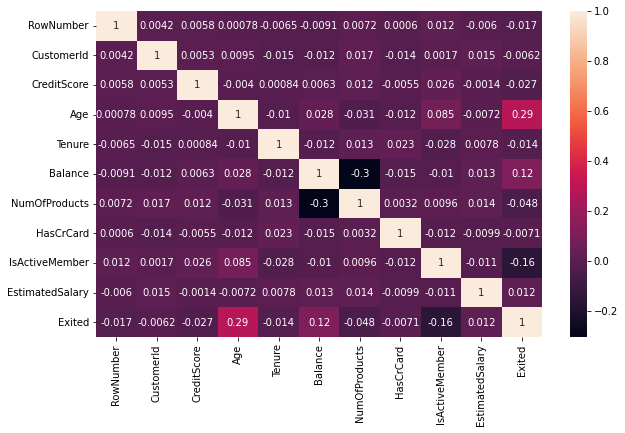

In [5]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True);

# The Effect of Categorical Variables on the Dependent Variable
- Average loss of customers is highest in Germany.

- Female customers left the bank more often.

- We cannot draw an exact conclusion from the Tenure variable. The distributions are close.

- It is observed that customers who buy more than 2 products have a high rate of loss, but let's not forget that our data is unstable. All of the customers (60 people) who bought 4 products left the bank.

- Customer churn rate with or without credit cards was close, but the data in our HasCrCard variable was unstable.

- Customers who do not actively use the bank leave the bank more.

In [6]:
cat_effect = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]

In [7]:
def kategorik_etki(variable):
    print("{} effect of variable on customer churn : \n".format(variable))
    print(df.groupby(variable)["Exited"].mean())
    sns.countplot(y = variable, hue = "Exited" , data = df)
    plt.show()

Geography effect of variable on customer churn : 

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


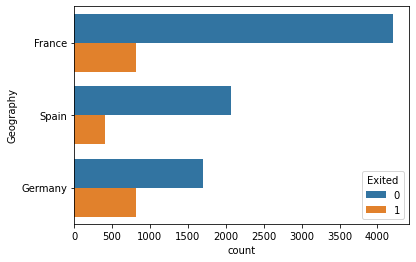

Gender effect of variable on customer churn : 

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


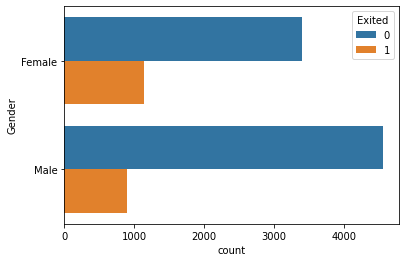

Tenure effect of variable on customer churn : 

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64


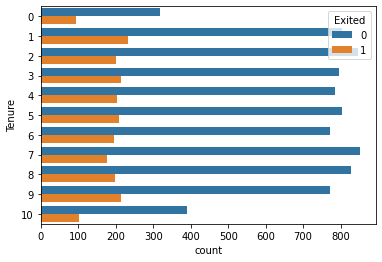

NumOfProducts effect of variable on customer churn : 

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


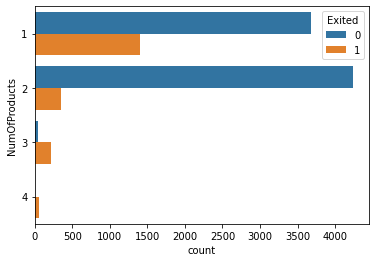

HasCrCard effect of variable on customer churn : 

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


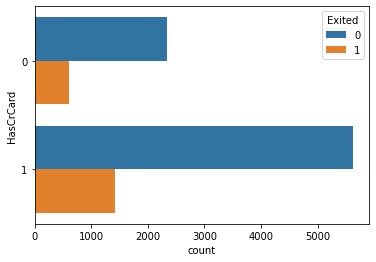

IsActiveMember effect of variable on customer churn : 

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


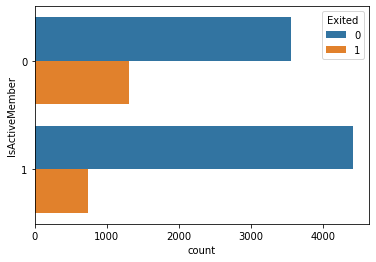

In [8]:
for i in cat_effect:
    kategorik_etki(i)

# Outliers
- The variables Credit Score, Age, Num Products have outlier observations.
- We create a function to detect outliers and keep the indexes of these values in a list.

In [9]:
list_ol = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [10]:
def outlier_show(variable):
    
    sns.boxplot(df[variable])
    plt.show()

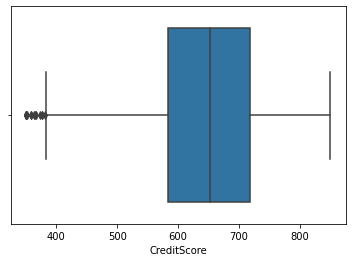

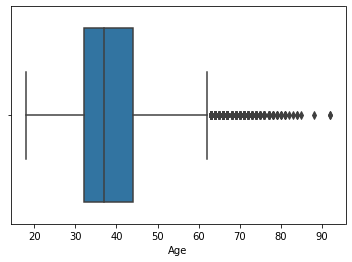

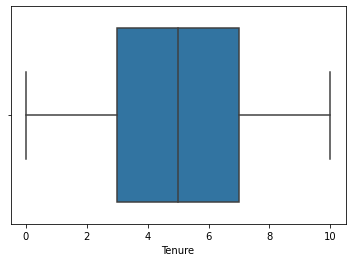

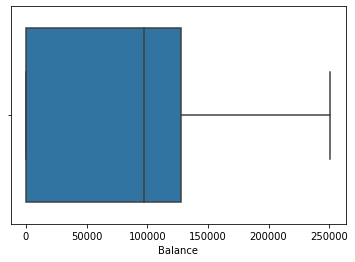

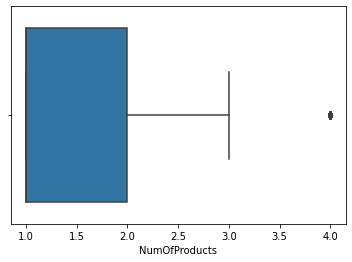

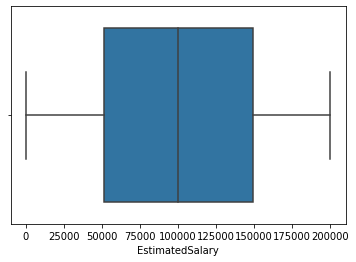

In [11]:
for i in list_ol:
    outlier_show(i)

In [12]:
def outlier(df_ol, degiskenler):
    
    aykiri_indexler = []
    
    for i in degiskenler:
        
        Q1 = df_ol[i].quantile(0.25)
        Q3 = df_ol[i].quantile(0.75)


        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR

        toplam_filtre = ((df_ol[i] < alt_sinir) | (df_ol[i] > ust_sinir))

        aykiri_gozlemler = df_ol[i][toplam_filtre]
        aykiri_index = aykiri_gozlemler.index
        
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    
    ortak_indexler = [i for i, v in aykiri_indexler.items() if v > 0]
    
    return ortak_indexler


In [13]:
ortak_indexler = outlier(df, ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"])

In [14]:
df.loc[ortak_indexler]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,9324,15815316,Kennedy,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
9370,9371,15732438,Cheng,561,France,Male,43,4,0.00,4,0,0,18522.91,1
9411,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1
9540,9541,15634551,Williamson,727,Germany,Male,46,3,115248.11,4,1,0,130752.01,1


In [15]:
#There are 1 or more outliers in 432 observations.
df.shape

(10000, 14)

In [16]:
#We deleted outlier observations from the data set.
df = df.drop(ortak_indexler, axis = 0).reset_index(drop = True)

In [17]:
df.shape

(9568, 14)

# The Effect of Numerical Variables on The Dependent Variable
- Yes, as we said while analyzing the correlation matrix, as the age of the customer increases, the customer losing rate increases.

- Average age of customers who did not leave the bank ==> 36

- Average age of customers leaving the bank ==> 43
- Since the value in the account balance of the customers is too much 0, we may not be able to make an accurate analysis, but we can say the following comments, when the customer's account balance is 0, usually customers have not left the bank and customers with account balances between 50000 and 200000 usually leave the bank.

- Average account balance of customers who cannot leave the bank ==> 72,870

- Average account balance of customers leaving the bank ==> 90,902

- But here, the high number of customers with 0 account balance makes our variable unbalanced.

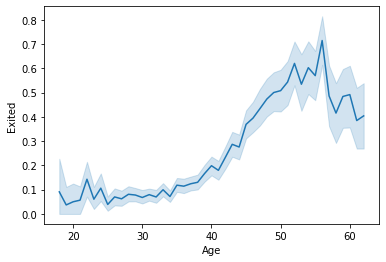

In [18]:
#Age-Exited
df.groupby(df["Exited"])["Age"].mean()
sns.lineplot(x = "Age", y = "Exited", data = df);

Exited
0    72870.208446
1    90902.407604
Name: Balance, dtype: float64


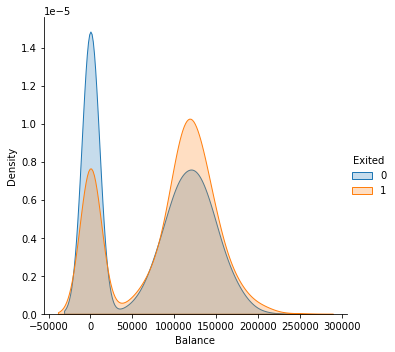

In [19]:
#Balance-Exited
print(df.groupby(df["Exited"])["Balance"].mean())
(sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Balance", shade= True).add_legend());

NumOfProducts  Exited
1              0         101228.606687
               1          91931.529217
2              0          48953.872650
               1          90796.121611
3              0          28196.098571
               1          84407.510718
Name: Balance, dtype: float64


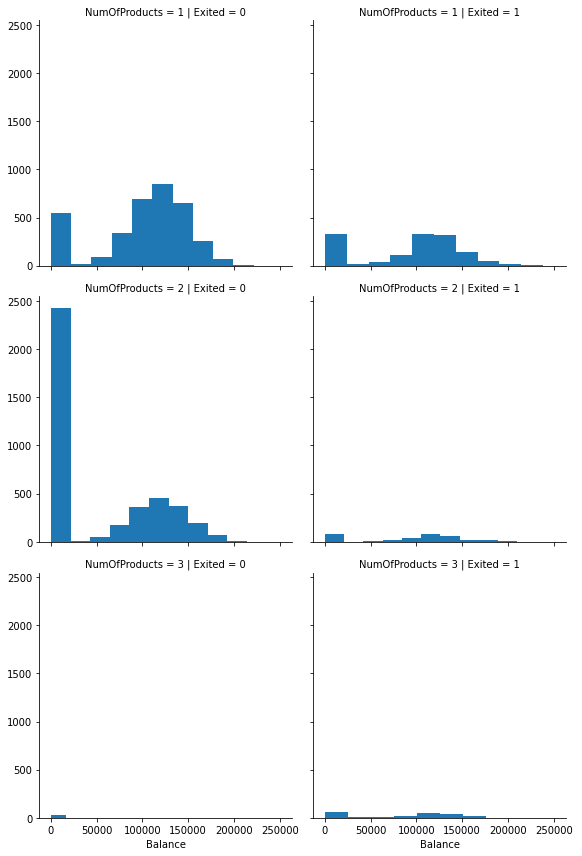

In [20]:
#NumOfProducts-Balance-Exited
print(df.groupby(["NumOfProducts","Exited"])["Balance"].mean())
(sns.FacetGrid(df, col = "Exited", row = "NumOfProducts", height = 4).map(plt.hist, "Balance",bins =10).add_legend());

# Feature Engineering
# Getting additional features to minimize the training error  

In [21]:
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

# Encoding the categorical data set

In [22]:
df = pd.get_dummies(df, columns = ["Geography"])
df = pd.get_dummies(df, columns = ["Gender"])
df = pd.get_dummies(df, columns = ["NumOfProducts"])
df = pd.get_dummies(df, columns = ["HasCrCard"])
df = pd.get_dummies(df, columns = ["IsActiveMember"])

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,...,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,1,15634602,Hargrave,619,42,2,0.00,101348.88,1,1,...,0,1,0,1,0,0,0,1,0,1
1,2,15647311,Hill,608,41,1,83807.86,112542.58,0,0,...,1,1,0,1,0,0,1,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,113931.57,1,1,...,0,1,0,0,0,1,0,1,1,0
3,4,15701354,Boni,699,39,1,0.00,93826.63,0,1,...,0,1,0,0,1,0,1,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,79084.10,0,0,...,1,1,0,1,0,0,0,1,0,1


In [24]:
#The variables that would not affect our problem in our data set were removed from the data set.
df.drop(["RowNumber","CustomerId","Surname","Tenure"], axis = 1 , inplace = True)
df

,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,1,0,1
1,608,41,83807.86,112542.58,0,0,0,1,1,0,1,0,0,1,0,0,1
2,502,42,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,1,1,0
3,699,39,0.00,93826.63,0,1,0,0,1,0,0,1,0,1,0,1,0
4,850,43,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,771,39,0.00,96270.64,0,1,0,0,0,1,0,1,0,0,1,1,0
9564,516,35,57369.61,101699.77,0,1,0,0,0,1,1,0,0,0,1,0,1
9565,709,36,0.00,42085.58,1,1,0,0,1,0,1,0,0,1,0,0,1
9566,772,42,75075.31,92888.52,1,0,1,0,0,1,0,1,0,0,1,1,0


# Feature Scaling
- Since the variables in our data set are unstable, we applied the normalization method.

In [25]:
x_df = df.drop(["Exited"], axis=1)
y = df["Exited"]

x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df)).values
x.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.505353,0.545455,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.481799,0.522727,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.254818,0.545455,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.676660,0.477273,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,0.568182,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

# Logistic Regression
- y = ax1 + bx2 + cx3 + e ===> using the sigmoid function y is the output of our dependent variable, x is the input of our independent variables (a, b, and c are the input coefficients of our independent variables), and e is our constant.

# Model Build

In [27]:
loj = LogisticRegression(solver = "liblinear")
loj.fit(x_train,y_train)
loj

LogisticRegression(solver='liblinear')

In [28]:
loj.intercept_

array([-0.83279865])

- Constant value (the "e" value in the equation).

In [29]:
loj.coef_

array([[-2.52171142e-01,  4.54915181e+00, -2.79827974e-01,
        -8.16600119e-03, -6.15455011e-01,  3.64005347e-01,
        -5.81348990e-01, -1.52526232e-01, -6.80272423e-01,
        -5.95319036e-01, -2.21381415e+00,  1.97633453e+00,
        -3.78490618e-01, -4.54308037e-01,  3.97442191e-03,
        -8.36773077e-01]])

- Coefficients of the inputs of the independent variables (the values a, b, c in the equation, of course, we have 16 arguments, not 3)

# Model Evaluate

In [38]:
print("Test accurarcy {}".format(loj.score(x_test,y_test)))

Test accurarcy 0.8474399164054337


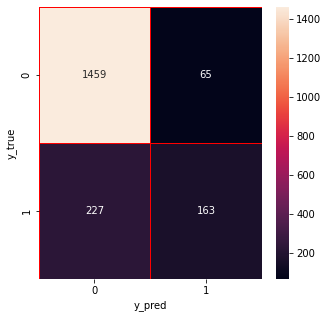

In [31]:
y_pred = loj.predict(x_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Model Tuning
- I apply cross validation to prevent overfitting.

In [32]:
round(cross_val_score(loj, x_test, y_test, cv = 10).mean()*100,4)

85.0055

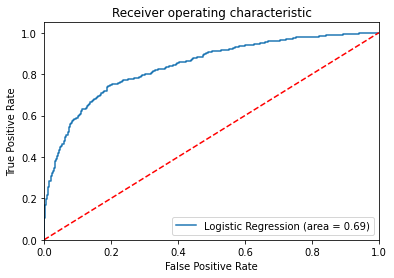

In [33]:
logistic_roc_auc = roc_auc_score(y_test, loj.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, loj.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()